#SVR Manual

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [9]:
class SVR(object):
    def __init__(self, epsilon=0.5):
        self.epsilon = epsilon

    def fit(self, X, y, epochs=100, learning_rate=0.1):
        self.sess = tf.Session()
        feature_len = X.shape[-1] if len(X.shape) > 1 else 1

        if len(X.shape) == 1:
            X = X.reshape(-1, 1)
        if len(y.shape) == 1:
            y = y.reshape(-1, 1)

        self.X = tf.placeholder(dtype=tf.float32, shape=(None, feature_len))
        self.y = tf.placeholder(dtype=tf.float32, shape=(None, 1))
        self.W = tf.Variable(tf.random_normal(shape=(feature_len, 1)))
        self.b = tf.Variable(tf.random_normal(shape=(1,)))
        self.y_pred = tf.matmul(self.X, self.W) + self.b
        self.loss = tf.norm(self.W)/2 + tf.reduce_mean(tf.maximum(0., tf.abs(self.y_pred - self.y) - self.epsilon))
        opt = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
        opt_op = opt.minimize(self.loss)
        self.sess.run(tf.global_variables_initializer())

        for i in range(epochs):
            loss = self.sess.run(
                self.loss,
                {
                    self.X: X,
                    self.y: y
                }
            )
            print("{}/{}: loss: {}".format(i + 1, epochs, loss))

            self.sess.run(
                opt_op,
                {
                    self.X: X,
                    self.y: y
                }
            )

        return self

    def predict(self, X, y=None):
        if len(X.shape) == 1:
            X = X.reshape(-1, 1)

        y_pred = self.sess.run(
            self.y_pred,
            {
                self.X: X
            }
        )
        return y_pred

In [11]:
df = pd.read_csv('dataset_new1.csv')
df

,Kode_Barang,Nama_Barang,Stok_1,Stok_2,Stok_3,Stok_4,Stok_5,Stok_6,Stok_7,Stok_8,Stok_9,Stok_10,Stok_11,Stok_12,Stok_13,Stok_14,Stok_15
0,A01,MEO PERSIAN 1.1 KG,12,15,13,14,13,14,11,14,16,17,14,13,12,12,13
1,A010,CAT CHOIZE TUNA ADULT 800 GR,24,26,24,26,24,24,24,25,26,25,25,22,30,27,28
2,A011,CAT CHOIZE SALMON KITTEN 1KG,24,22,25,22,23,24,25,22,22,22,22,25,24,23,25
3,A012,CAT CHOIZE SALMON ADULT 800GR,105,102,90,102,90,105,90,101,102,101,101,105,20,21,90
4,A013,ORICAT ADULT 1KG,11,15,19,15,19,11,19,15,15,15,15,26,40,41,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,A361,IMMUNE SUPPORT 50 KAPSUL,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
341,A362,ROYAL CARE VIT BULU,4,4,4,4,4,4,4,4,4,4,4,12,4,4,4
342,A363,ROYAL CARE GEMUK,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
343,A364,ROYAL CARE VIT IMUN,12,12,12,12,12,12,12,12,12,12,12,4,12,12,12


In [12]:
X = df.drop(['Kode_Barang', 'Nama_Barang', 'Stok_15'], axis=1)
X = X.to_numpy()

In [13]:
degree = 3
c = 1

y = degree * df['Stok_15'] + c
y = y.to_numpy()

In [14]:
model = SVR(epsilon=0.5)
model.fit(X, y)

1/100: loss: 36.674800872802734
2/100: loss: 382.708740234375
3/100: loss: 569.3746337890625
4/100: loss: 382.7537536621094
5/100: loss: 569.3238525390625
6/100: loss: 382.7976989746094
7/100: loss: 569.2744140625
8/100: loss: 382.8406066894531
9/100: loss: 569.2263793945312
10/100: loss: 382.8823547363281
11/100: loss: 569.1797485351562
12/100: loss: 382.9230651855469
13/100: loss: 569.1343994140625
14/100: loss: 382.9627685546875
15/100: loss: 569.0904541015625
16/100: loss: 383.0014343261719
17/100: loss: 569.0477905273438
18/100: loss: 383.0389709472656
19/100: loss: 569.0064086914062
20/100: loss: 383.07562255859375
21/100: loss: 568.9661865234375
22/100: loss: 383.11126708984375
23/100: loss: 568.9273071289062
24/100: loss: 383.1459045410156
25/100: loss: 568.8895874023438
26/100: loss: 383.1795349121094
27/100: loss: 568.8530883789062
28/100: loss: 383.2122497558594
29/100: loss: 568.817626953125
30/100: loss: 383.24407958984375
31/100: loss: 568.7832641601562
32/100: loss: 383.

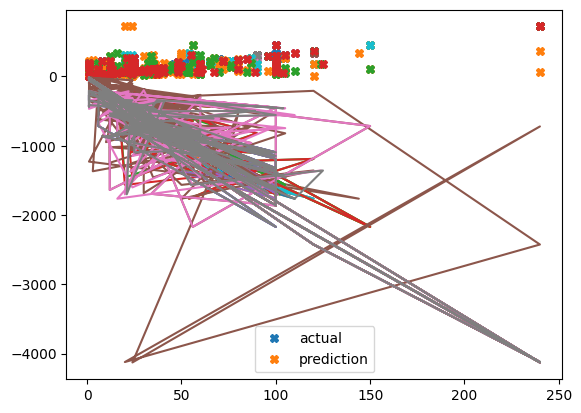

In [15]:
plt.plot(
    X, y, "X",
    X, model.predict(X), "-"
)
plt.legend(["actual", "prediction"])

#SVR Tuned

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics

In [17]:
df = pd.read_csv('dataset_new1.csv')
df = df.dropna()
df.head()

,Kode_Barang,Nama_Barang,Stok_1,Stok_2,Stok_3,Stok_4,Stok_5,Stok_6,Stok_7,Stok_8,Stok_9,Stok_10,Stok_11,Stok_12,Stok_13,Stok_14,Stok_15
0,A01,MEO PERSIAN 1.1 KG,12,15,13,14,13,14,11,14,16,17,14,13,12,12,13
1,A010,CAT CHOIZE TUNA ADULT 800 GR,24,26,24,26,24,24,24,25,26,25,25,22,30,27,28
2,A011,CAT CHOIZE SALMON KITTEN 1KG,24,22,25,22,23,24,25,22,22,22,22,25,24,23,25
3,A012,CAT CHOIZE SALMON ADULT 800GR,105,102,90,102,90,105,90,101,102,101,101,105,20,21,90
4,A013,ORICAT ADULT 1KG,11,15,19,15,19,11,19,15,15,15,15,26,40,41,19


In [18]:
X = df[['Stok_1', 'Stok_2', 'Stok_3', 'Stok_4', 'Stok_5', 'Stok_6', 'Stok_7', 'Stok_8', 'Stok_9', 'Stok_10', 'Stok_11', 'Stok_12', 'Stok_13', 'Stok_14']]
y = df['Stok_15']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
tuned_parameters = [{'kernel': ['linear', 'rbf', 'poly'],
                     'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]
clf = GridSearchCV(SVR(), tuned_parameters)
clf.fit(X,y)
clf.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'linear'}

In [21]:
regressor = SVR(C=1000, gamma=0.001, kernel='linear')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [22]:
dataset = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dataset

,Actual,Predicted
142,12,12.042552
6,22,22.036355
60,23,23.004112
339,12,12.074171
54,65,64.848146
...,...,...
231,24,24.070852
299,1,1.091706
21,60,60.067358
248,24,24.065583


In [26]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Coefficient of determination: %.2f' % metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.06592830983047504
Mean Squared Error: 0.005589980406693677
Root Mean Squared Error: 0.07476617153963198
Coefficient of determination: 1.00


In [25]:
import joblib
filename = 'model_svr.pkl'
joblib.dump(regressor, filename)

['model_svr.pkl']